In [87]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
df.shape

(32560, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


All columns are having not-null values, no null values exist

In [8]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

# Data Visualization

<AxesSubplot:>

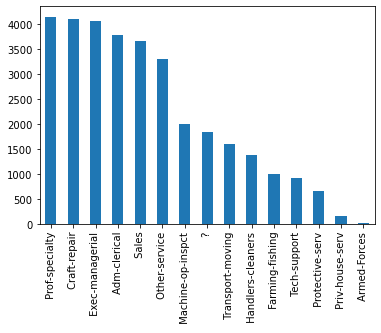

In [10]:
import seaborn as sns

df['Occupation'].value_counts().plot(kind='bar')

<AxesSubplot:>

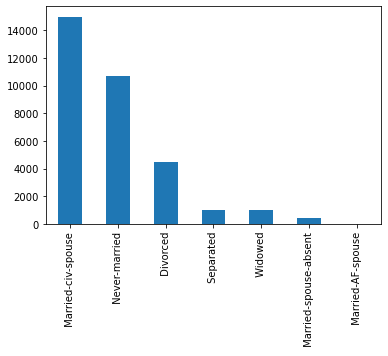

In [15]:
df['Marital_status'].value_counts().plot(kind='bar')

<AxesSubplot:>

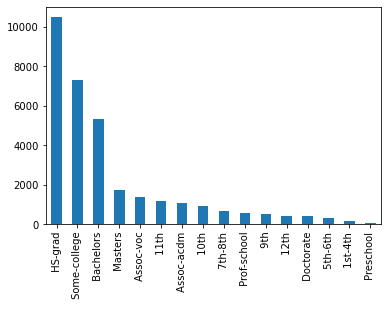

In [16]:
df['Education'].value_counts().plot(kind='bar')

<AxesSubplot:>

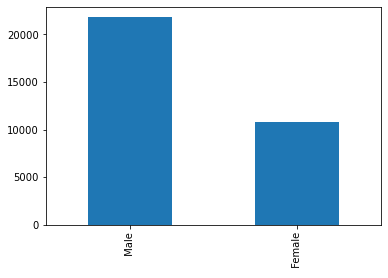

In [17]:
df['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

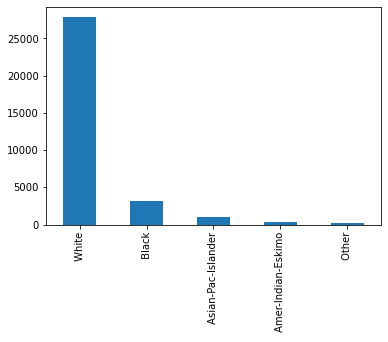

In [18]:
df['Race'].value_counts().plot(kind='bar')

<AxesSubplot:>

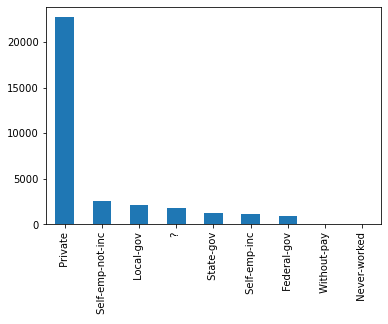

In [19]:
df['Workclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

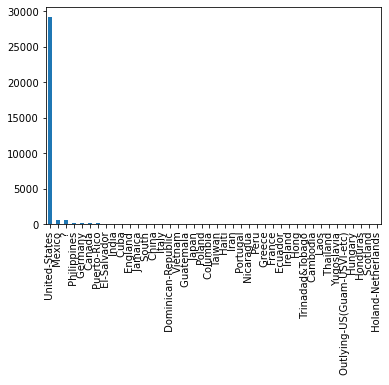

In [20]:
df['Native_country'].value_counts().plot(kind='bar')

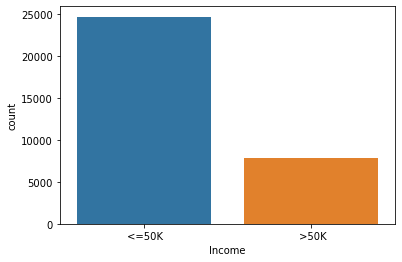

<Figure size 720x720 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

sns.countplot(df['Income'])
plt.figure(figsize=(10,10))
plt.show()

Data seems unbalanced, as we have less number opf people earning >50k hence, we can apply SMOTE to balance it.


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Workclass'] = le.fit_transform(df['Workclass'])
df['Education'] = le.fit_transform(df['Education'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Income'] = le.fit_transform(df['Income'])
df['Native_country'] = le.fit_transform(df['Native_country'])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


Converting all categorical values to numeric

In [23]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


Seems no relation between Fnlwgt and Income, hence dropping Fnlwgt column for prediction

In [25]:
df.drop(['Fnlwgt'], axis=1, inplace=True)
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,12,14,2,4,5,4,0,0,0,40,39,0


# Model Selection 

In [27]:
x = df.drop(['Income'], axis = 1)
y = df['Income']

In [28]:
x

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,9,13,2,4,0,4,1,0,0,13,39
1,38,4,11,9,0,6,1,4,1,0,0,40,39
2,53,4,1,7,2,6,0,2,1,0,0,40,39
3,28,4,9,13,2,10,5,2,0,0,0,40,5
4,37,4,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,11,9,4,1,3,4,1,0,0,20,39


In [29]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
y_train.value_counts()

0    18488
1     5932
Name: Income, dtype: int64

almost 1/3 rd data differenece in target values, balancing it through SMOTE

In [33]:
from collections import Counter
Counter(y_train)

Counter({0: 18488, 1: 5932})

In [50]:
from imblearn.over_sampling import SMOTE

ove_smp = SMOTE(0.75)

x_train_ns, y_train_ns = ove_smp.fit_resample(x_train, y_train)

In [51]:
Counter(y_train)

Counter({0: 18488, 1: 5932})

In [52]:
Counter(y_train_ns)

Counter({0: 18488, 1: 13866})

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(max_depth=10, max_features=10, n_estimators=25)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print('Classification Report with RandomForestClassifier :', "\n",  classification_report(y_test,rf_pred))
print('Accuracy with RandomForestClassifier : ', accuracy_score(rf_pred,y_test) , "\n")
print('Confusion Matrix with RandomForestClassifier : ', "\n", confusion_matrix(rf_pred,y_test), "\n")
print('roc_auc_score with RandomForestClassifier: ', roc_auc_score(rf_pred,y_test))

Classification Report with RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      6231
           1       0.77      0.58      0.66      1909

    accuracy                           0.86      8140
   macro avg       0.82      0.76      0.78      8140
weighted avg       0.85      0.86      0.85      8140

Accuracy with RandomForestClassifier :  0.8594594594594595 

Confusion Matrix with RandomForestClassifier :  
 [[5898  811]
 [ 333 1098]] 

roc_auc_score with RandomForestClassifier:  0.8232066003519163


In [89]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

print('Classification Report with XGBClassifier :', "\n",  classification_report(y_test,xgb_pred))
print('Accuracy with XGBClassifier : ', accuracy_score(xgb_pred,y_test) , "\n")
print('Confusion Matrix with XGBClassifier : ', "\n", confusion_matrix(xgb_pred,y_test), "\n")
print('roc_auc_score with XGBClassifier: ', roc_auc_score(xgb_pred,y_test))

[13:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report with XGBClassifier : 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      6231
           1       0.77      0.66      0.71      1909

    accuracy                           0.87      8140
   macro avg       0.83      0.80      0.81      8140
weighted avg       0.87      0.87      0.87      8140

Accuracy with XGBClassifier :  0.8729729729729729 

Confusion Matrix with XGBClassifier :  
 [[5849  652]
 [ 382 1257]] 

roc_auc_score with XGBClassifier:  0.8333193963964243


In [79]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

print('Classification Report with LogisticRegression :', "\n",  classification_report(y_test,lr_predict))
print('Accuracy with LogisticRegression : ', accuracy_score(lr_predict,y_test) , "\n")
print('Confusion Matrix with LogisticRegression : ', "\n", confusion_matrix(lr_predict,y_test), "\n")
print('roc_auc_score with LogisticRegression: ', roc_auc_score(lr_predict,y_test))

Classification Report with LogisticRegression : 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      6231
           1       0.64      0.37      0.47      1909

    accuracy                           0.80      8140
   macro avg       0.73      0.65      0.67      8140
weighted avg       0.78      0.80      0.78      8140

Accuracy with LogisticRegression :  0.8025798525798525 

Confusion Matrix with LogisticRegression :  
 [[5827 1203]
 [ 404  706]] 

roc_auc_score with LogisticRegression:  0.7324561403508772


In [81]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_predict = dt.predict(x_test)

print('Classification Report with DecisionTreeClassifier :', "\n",  classification_report(y_test,dt_predict))
print('Accuracy with DecisionTreeClassifier : ', accuracy_score(dt_predict,y_test) , "\n")
print('Confusion Matrix with DecisionTreeClassifier : ', "\n", confusion_matrix(dt_predict,y_test), "\n")
print('roc_auc_score with DecisionTreeClassifier: ', roc_auc_score(dt_predict,y_test))

Classification Report with DecisionTreeClassifier : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      6231
           1       0.60      0.60      0.60      1909

    accuracy                           0.81      8140
   macro avg       0.74      0.74      0.74      8140
weighted avg       0.81      0.81      0.81      8140

Accuracy with DecisionTreeClassifier :  0.8111793611793612 

Confusion Matrix with DecisionTreeClassifier :  
 [[5462  768]
 [ 769 1141]] 

roc_auc_score with DecisionTreeClassifier:  0.7370538603111108


In [82]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_predict = nb.predict(x_test)


print('Classification Report with DecisionTreeClassifier :', "\n",  classification_report(y_test,nb_predict))
print('Accuracy with DecisionTreeClassifier : ', accuracy_score(nb_predict,y_test) , "\n")
print('Confusion Matrix with DecisionTreeClassifier : ', "\n", confusion_matrix(nb_predict,y_test), "\n")
print('roc_auc_score with DecisionTreeClassifier: ', roc_auc_score(nb_predict,y_test))

Classification Report with DecisionTreeClassifier : 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      6231
           1       0.66      0.32      0.43      1909

    accuracy                           0.80      8140
   macro avg       0.74      0.63      0.66      8140
weighted avg       0.78      0.80      0.77      8140

Accuracy with DecisionTreeClassifier :  0.801965601965602 

Confusion Matrix with DecisionTreeClassifier :  
 [[5920 1301]
 [ 311  608]] 

roc_auc_score with DecisionTreeClassifier:  0.7407098658413626


In [83]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
svc_predict = svc.predict(x_test)

print('Classification Report with DecisionTreeClassifier :', "\n",  classification_report(y_test,svc_predict))
print('Accuracy with DecisionTreeClassifier : ', accuracy_score(svc_predict,y_test) , "\n")
print('Confusion Matrix with DecisionTreeClassifier : ', "\n", confusion_matrix(svc_predict,y_test), "\n")
print('roc_auc_score with DecisionTreeClassifier: ', roc_auc_score(svc_predict,y_test))

Classification Report with DecisionTreeClassifier : 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      6231
           1       0.73      0.26      0.38      1909

    accuracy                           0.80      8140
   macro avg       0.77      0.62      0.63      8140
weighted avg       0.79      0.80      0.77      8140

Accuracy with DecisionTreeClassifier :  0.8035626535626536 

Confusion Matrix with DecisionTreeClassifier :  
 [[6044 1412]
 [ 187  497]] 

roc_auc_score with DecisionTreeClassifier:  0.7686152523655347


In [90]:
import pickle
filename = 'census_income.pkl'
pickle.dump(xgb, open(filename, 'wb' ))

Saving the model with XGBClassifier as the accuracy is 88 % the greatest among all the other models

In [91]:
filename = 'census_income.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8729729729729729
